In [507]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [508]:
#import quandl
#mydata = quandl.get("OWF/NYM_CL_CL_1M_IVS", authtoken="4WYwYYS5mUJ66Zx6WSCg")
df = pd.read_csv(r'C:\Users\Sid\Documents\Code\dengue-data-resampled.csv')

In [509]:
df = df.set_index('Date')
df.index= pd.to_datetime(df.index)
df.head()
df.shape

(7260, 84)

In [510]:
#df = pd.DataFrame(mydata)

In [511]:
df.head()

,temperature-admiralty,temperature-ang-mo-kio,temperature-boon-lay-east,temperature-changi,temperature-choa-chu-kang-south,temperature-clementi,temperature-east-coast-parkway,temperature-jurong-island,temperature-khatib,temperature-marina-barrage,...,rainfall-tuas,rainfall-tuas-south,rainfall-tuas-west,rainfall-ulu-pandan,rainfall-upper-peirce-reservoir,rainfall-upper-thomson,rainfall-whampoa,rainfall-yishun,population-sg,dengue-sg
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-25,27.035156,26.758643,27.626396,27.665803,26.226598,26.541611,27.129691,27.205739,26.319309,27.238869,...,0.0,27.0,0.0,9.428571,16.0,11.0,15.0,1.0,3964203,15
2000-01-26,27.035276,26.758828,27.626522,27.665858,26.226852,26.541805,27.129869,27.205932,26.319539,27.239105,...,0.0,27.0,0.0,9.571429,16.0,10.0,15.0,1.0,3964203,15
2000-01-27,27.035397,26.759013,27.626647,27.665913,26.227105,26.542000,27.130047,27.206126,26.319769,27.239341,...,0.0,27.0,0.0,9.714286,16.0,9.0,15.0,1.0,3964203,15
2000-01-28,27.035517,26.759199,27.626772,27.665968,26.227359,26.542195,27.130225,27.206319,26.319999,27.239577,...,0.0,27.0,0.0,9.857143,16.0,8.0,15.0,1.0,3964203,15
2000-01-29,27.035637,26.759384,27.626898,26.000000,26.227612,26.542390,27.130403,27.206512,26.320229,27.239813,...,0.0,27.0,0.0,10.000000,16.0,7.0,15.0,1.0,3964203,15


In [512]:
df.index

DatetimeIndex(['2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-01-02',
               '2000-02-02', '2000-03-02',
               ...
               '2019-01-12', '2019-02-12', '2019-03-12', '2019-04-12',
               '2019-05-12', '2019-06-12', '2019-07-12', '2019-08-12',
               '2019-09-12', '2019-10-12'],
              dtype='datetime64[ns]', name='Date', length=7260, freq=None)

SELECT THE MOST IMPORTANT FEATURES

In [513]:
list_of_features = ['population-sg',
 'temperature-tengah',
 'temperature-boon-lay-east',
 'temperature-sembawang',
 'temperature-marina-barrage',
 'temperature-sentosa-island',
 'temperature-newton',
 'temperature-semakau-island',
 'temperature-choa-chu-kang-south',
 'temperature-clementi',
 'temperature-pulau-ubin',
 'temperature-ang-mo-kio',
 'temperature-tai-seng',
 'temperature-changi',
 'temperature-jurong-island',
 'temperature-tuas-south',
 'temperature-pasir-panjang',
 'temperature-seletar',
 'temperature-khatib',
 'rainfall-jurong-north',                  
 'rainfall-tuas-west',
 'rainfall-semakau-island',
 'rainfall-pasir-ris-west',
 'rainfall-tuas-south',
 'rainfall-pasir-panjang',
 'rainfall-pulau-ubin',
 'rainfall-sentosa-island',
 'rainfall-tuas',
 'rainfall-lim-chu-kang',
 'rainfall-tengah',
 'rainfall-marina-barrage',
 'rainfall-seletar',
 'rainfall-ang-mo-kio',
 'rainfall-admiralty',
 'rainfall-choa-chu-kang-west',
 'rainfall-choa-chu-kang-south',
 'rainfall-ulu-pandan',
 'rainfall-toa-payoh',
 'rainfall-serangoon',
 'rainfall-paya-lebar',
 'rainfall-sembawang',
 'rainfall-dhoby-ghaut',
 'rainfall-chai-chee',
 'rainfall-simei',
 'rainfall-boon-lay-east',
 'rainfall-upper-thomson',
 'rainfall-buangkok',
    'dengue-sg']

In [514]:
len(list_of_features)

48

In [515]:
df = df[list_of_features]

In [516]:
df.head()

,population-sg,temperature-tengah,temperature-boon-lay-east,temperature-sembawang,temperature-marina-barrage,temperature-sentosa-island,temperature-newton,temperature-semakau-island,temperature-choa-chu-kang-south,temperature-clementi,...,rainfall-serangoon,rainfall-paya-lebar,rainfall-sembawang,rainfall-dhoby-ghaut,rainfall-chai-chee,rainfall-simei,rainfall-boon-lay-east,rainfall-upper-thomson,rainfall-buangkok,dengue-sg
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-25,3964203,26.801864,27.626396,27.169526,27.238869,26.913994,26.607557,27.761671,26.226598,26.541611,...,13.857143,16.857143,12.142857,14.0,5.0,4.0,28.0,11.0,21.142857,15
2000-01-26,3964203,26.801994,27.626522,27.169577,27.239105,26.914203,26.607739,27.761770,26.226852,26.541805,...,14.142857,19.142857,9.857143,14.0,5.0,4.0,28.0,10.0,20.857143,15
2000-01-27,3964203,26.802124,27.626647,27.169628,27.239341,26.914413,26.607921,27.761869,26.227105,26.542000,...,14.428571,21.428571,7.571429,14.0,5.0,4.0,28.0,9.0,20.571429,15
2000-01-28,3964203,26.802253,27.626772,27.169679,27.239577,26.914622,26.608103,27.761968,26.227359,26.542195,...,14.714286,23.714286,5.285714,14.0,5.0,4.0,28.0,8.0,20.285714,15
2000-01-29,3964203,25.000000,27.626898,26.000000,27.239813,26.914832,26.608285,27.762067,26.227612,26.542390,...,15.000000,26.000000,3.000000,14.0,5.0,4.0,28.0,7.0,20.000000,15


In [517]:
#CAREFUL PICKING OF TEMPERATURE AND RAINFALL STATIONS BASED ON PROXIMITY


In [518]:

# Resampling to daily frequency
#df.index = df.Date
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

In [519]:
df_year.head()

,population-sg,temperature-tengah,temperature-boon-lay-east,temperature-sembawang,temperature-marina-barrage,temperature-sentosa-island,temperature-newton,temperature-semakau-island,temperature-choa-chu-kang-south,temperature-clementi,...,rainfall-serangoon,rainfall-paya-lebar,rainfall-sembawang,rainfall-dhoby-ghaut,rainfall-chai-chee,rainfall-simei,rainfall-boon-lay-east,rainfall-upper-thomson,rainfall-buangkok,dengue-sg
Date,,,,,,,,,,,,,,,,,,,,,
2000-12-31,3.997153e+06,26.827613,27.647756,27.159526,27.279128,26.949708,26.638570,27.778552,26.269824,26.574816,...,6.953342,6.888429,7.422097,14.0,5.0,4.0,28.0,5.774269,7.415372,12.912281
2001-12-31,4.086226e+06,26.895419,27.692042,27.192900,27.362599,27.023754,26.702870,27.813554,26.359446,26.643660,...,6.975959,6.736438,7.539041,14.0,5.0,4.0,28.0,6.512877,7.596027,45.597260
2002-12-31,4.158095e+06,26.953470,27.737768,27.288216,27.448785,27.100209,26.769262,27.849693,26.451983,26.714744,...,6.176644,5.784932,6.758767,14.0,5.0,4.0,28.0,5.439452,5.454110,73.542466
2003-12-31,4.144049e+06,26.972143,27.783494,27.268524,27.534971,27.176664,26.835653,27.885833,26.544520,26.785828,...,7.548737,6.980974,7.179361,14.0,5.0,4.0,28.0,8.603775,7.187215,95.912329
2004-12-31,4.141987e+06,27.010105,27.829282,27.259812,27.621276,27.253224,26.902136,27.922022,26.637184,26.857010,...,7.707954,7.081815,7.507741,14.0,5.0,4.0,28.0,7.396782,7.176685,177.590164


#SCALE THE DATA

In [520]:
df[list_of_features[1:2]].head()

,temperature-tengah
Date,
2000-01-02,26.802771
2000-01-03,26.806530
2000-01-04,26.810547
2000-01-05,26.814435
2000-01-06,26.818452


In [521]:
df[list_of_features[1:19]] = df[list_of_features[1:19]].rolling('10D').max()
df[list_of_features[20:46]] = df[list_of_features[20:46]].rolling('10D').sum()
df['TempXRainfall'] = (df[list_of_features[1:19]].sum(axis =1))*(df[list_of_features[20:46]].sum(axis =1))
#df['TempXRainfall'] = df['TempXRainfall'].rolling('10D').mean()
#df['Pop'] = (df['Pop']-df['population-sg'])/df['population']


In [522]:
df['Temp'] = df[list_of_features[1:19]].max(axis =1)
df['Rainfall'] = df[list_of_features[20:46]].sum(axis =1)
#df['TempxRainfall'] = df['TempxRainfall'].rolling('10D').mean()
#df['Pop'] = df['population-sg'].rolling('10D').mean()


In [523]:
df.head()

,population-sg,temperature-tengah,temperature-boon-lay-east,temperature-sembawang,temperature-marina-barrage,temperature-sentosa-island,temperature-newton,temperature-semakau-island,temperature-choa-chu-kang-south,temperature-clementi,...,rainfall-dhoby-ghaut,rainfall-chai-chee,rainfall-simei,rainfall-boon-lay-east,rainfall-upper-thomson,rainfall-buangkok,dengue-sg,TempXRainfall,Temp,Rainfall
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-02,4005210.0,26.802771,27.627273,27.169882,27.240522,26.915460,26.608830,27.762364,26.228373,26.542974,...,14.0,5.0,4.0,28.0,6.181818,15.636364,15.0,110945.695266,27.762364,227.818182
2000-01-03,3988014.0,26.806530,27.630906,27.171357,27.247369,26.921535,26.614105,27.765235,26.235725,26.548622,...,28.0,10.0,8.0,56.0,12.404040,9.444444,16.0,217256.607318,27.765235,446.040404
2000-01-04,3970817.0,26.810547,27.634790,27.172933,27.254689,26.928028,26.619744,27.768305,26.243584,26.554659,...,42.0,15.0,12.0,84.0,14.070707,2.333333,12.0,310462.178804,27.768305,637.276515
2000-01-05,3965526.0,26.814435,27.638548,27.174458,27.261773,26.934312,26.625201,27.771275,26.251190,26.560501,...,56.0,20.0,16.0,112.0,17.404040,7.000000,12.0,406184.136493,27.771275,833.609848
2000-01-06,3982723.0,26.818452,27.642432,27.176034,27.269093,26.940805,26.630840,27.774344,26.259050,26.566539,...,70.0,25.0,20.0,140.0,24.404040,3.333333,7.0,509146.066116,27.774344,1044.720960


In [524]:
df.drop(df.iloc[:,1:47],inplace = True,axis =1)

In [525]:
df.head()

,population-sg,dengue-sg,TempXRainfall,Temp,Rainfall
Date,,,,,
2000-01-02,4005210.0,15.0,110945.695266,27.762364,227.818182
2000-01-03,3988014.0,16.0,217256.607318,27.765235,446.040404
2000-01-04,3970817.0,12.0,310462.178804,27.768305,637.276515
2000-01-05,3965526.0,12.0,406184.136493,27.771275,833.609848
2000-01-06,3982723.0,7.0,509146.066116,27.774344,1044.720960


In [526]:
df = df.reindex(columns = ['Temp','Rainfall','TempXRainfall','population-sg','dengue-sg'])

In [527]:
df.head()

,Temp,Rainfall,TempXRainfall,population-sg,dengue-sg
Date,,,,,
2000-01-02,27.762364,227.818182,110945.695266,4005210.0,15.0
2000-01-03,27.765235,446.040404,217256.607318,3988014.0,16.0
2000-01-04,27.768305,637.276515,310462.178804,3970817.0,12.0
2000-01-05,27.771275,833.609848,406184.136493,3965526.0,12.0
2000-01-06,27.774344,1044.720960,509146.066116,3982723.0,7.0


In [528]:
df.head()
df.index

DatetimeIndex(['2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',
               '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09',
               '2000-01-10', '2000-01-11',
               ...
               '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
               '2019-12-06', '2019-12-07', '2019-12-08', '2019-12-09',
               '2019-12-10', '2019-12-11'],
              dtype='datetime64[ns]', name='Date', length=7284, freq='D')

In [529]:
df = df.dropna()
df.isnull().sum()
#df = df.reset_index(drop = True)
df.index

DatetimeIndex(['2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',
               '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09',
               '2000-01-10', '2000-01-11',
               ...
               '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
               '2019-12-06', '2019-12-07', '2019-12-08', '2019-12-09',
               '2019-12-10', '2019-12-11'],
              dtype='datetime64[ns]', name='Date', length=7260, freq=None)

In [530]:
df_train = df[df.index < datetime(year=2014, month=12, day=15, hour=0)]
df_test = df[df.index >= datetime(year=2015, month=1,  day=1, hour=0)]
df_test = df_test[df_test.index <= datetime(year=2019, month =6, day =1, hour =0)]   
df_val =  df[df.index > datetime(year=2019, month=7, day=1, hour=0)]

In [531]:
df_train.head()
df_test.head()

,Temp,Rainfall,TempXRainfall,population-sg,dengue-sg
Date,,,,,
2015-01-01,28.526939,3597.678571,1.810190e+06,5507818.0,188.0
2015-01-02,28.534259,3270.107143,1.645671e+06,5491543.0,259.0
2015-01-03,28.534259,2915.678571,1.467306e+06,5470261.0,158.0
2015-01-04,28.548190,2745.107143,1.381947e+06,5486535.0,130.0
2015-01-05,28.555274,2498.250000,1.257896e+06,5514077.0,113.0


In [532]:
df_train.reindex(columns = ['Temp','Rainfall','TempXRainfall','population-sg','dengue-sg'])
df_test.reindex(columns = ['Temp','Rainfall','TempXRainfall','population-sg','dengue-sg'])

,Temp,Rainfall,TempXRainfall,population-sg,dengue-sg
Date,,,,,
2015-01-01,28.526939,3597.678571,1.810190e+06,5507818.0,188.0
2015-01-02,28.534259,3270.107143,1.645671e+06,5491543.0,259.0
2015-01-03,28.534259,2915.678571,1.467306e+06,5470261.0,158.0
2015-01-04,28.548190,2745.107143,1.381947e+06,5486535.0,130.0
2015-01-05,28.555274,2498.250000,1.257896e+06,5514077.0,113.0
...,...,...,...,...,...
2019-05-28,30.000000,1003.600000,5.166090e+05,5655744.0,378.0
2019-05-29,30.000000,992.285714,5.107857e+05,5655744.0,378.0
2019-05-30,30.000000,1004.023810,5.168288e+05,5655744.0,378.0


In [533]:
X_train = df_train[:-1]
X_train
y_train = df_train['dengue-sg']
y_train
X_test = df_test[:-1]
y_test = df_test['dengue-sg']
X_val = df_val[:-1]
y_val = df_val['dengue-sg']
#df_train.head()

In [534]:
#scale data 
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
X_test_minmax  = mm_scaler.transform(X_test)


In [535]:
X_train_minmax  = pd.DataFrame(X_train_minmax)
X_train_minmax.index = X_train.index
X_train_minmax.columns = X_train.columns

In [536]:
X_train_minmax.head()


,Temp,Rainfall,TempXRainfall,population-sg,dengue-sg
Date,,,,,
2000-01-02,0.000214,0.020349,0.018651,0.029863,0.013514
2000-01-03,0.001101,0.054707,0.052541,0.018445,0.014640
2000-01-04,0.002049,0.084816,0.082253,0.007026,0.010135
2000-01-05,0.002966,0.115728,0.112768,0.003513,0.010135
2000-01-06,0.003914,0.148966,0.145591,0.014932,0.004505


In [537]:
X_test_minmax  = pd.DataFrame(X_test_minmax)
X_test_minmax.index = X_test.index
X_test_minmax.columns = X_test.columns

In [538]:
X_test_minmax.head()

,Temp,Rainfall,TempXRainfall,population-sg,dengue-sg
Date,,,,,
2015-01-01,0.236316,0.550917,0.560343,1.027605,0.208333
2015-01-02,0.238576,0.499342,0.507897,1.016799,0.288288
2015-01-03,0.238576,0.443539,0.451037,1.002667,0.174550
2015-01-04,0.242878,0.416684,0.423826,1.013473,0.143018
2015-01-05,0.245066,0.377817,0.384280,1.031761,0.123874


In [543]:
df_train.info()
df_train.index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5438 entries, 2000-01-02 to 2014-12-14
Data columns (total 5 columns):
Temp             5438 non-null float64
Rainfall         5438 non-null float64
TempXRainfall    5438 non-null float64
population-sg    5438 non-null float64
dengue-sg        5438 non-null float64
dtypes: float64(5)
memory usage: 254.9 KB


DatetimeIndex(['2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',
               '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09',
               '2000-01-10', '2000-01-11',
               ...
               '2014-12-05', '2014-12-06', '2014-12-07', '2014-12-08',
               '2014-12-09', '2014-12-10', '2014-12-11', '2014-12-12',
               '2014-12-13', '2014-12-14'],
              dtype='datetime64[ns]', name='Date', length=5438, freq=None)

In [500]:

# Resampling to daily frequency
#df.index = df.Date
#df = df.resample('D').mean()

# Resampling to monthly frequency
#df_month = df.resample('M').mean()

# Resampling to annual frequency
#df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
#df_Q = df.resample('Q-DEC').mean()

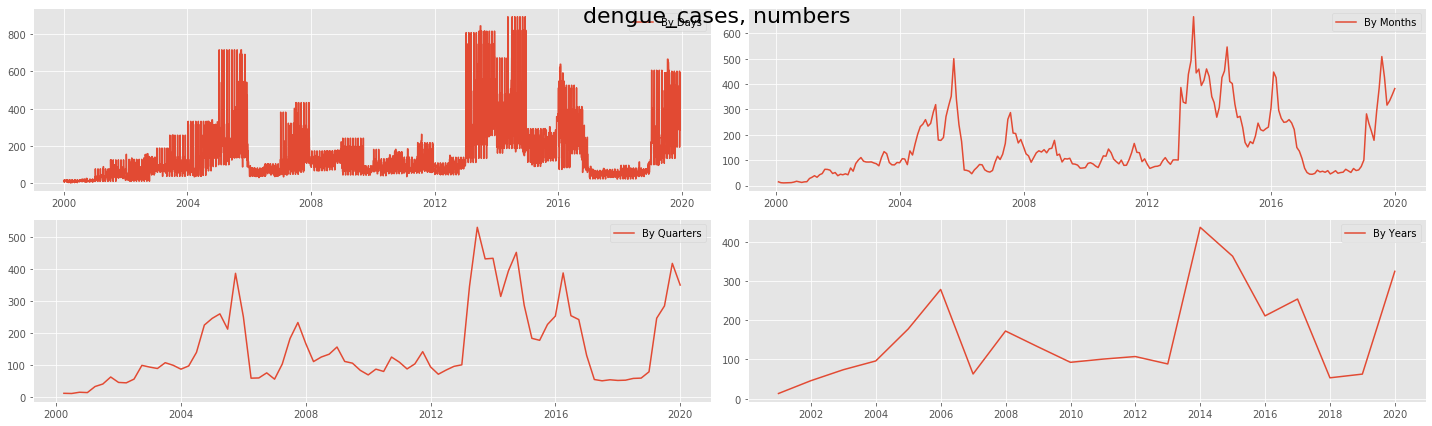

In [539]:
# PLOTS
fig = plt.figure(figsize=[20,6])
plt.suptitle('dengue_cases, numbers', fontsize=22)

plt.subplot(221)
plt.plot(df['dengue-sg'], '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month['dengue-sg'], '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q['dengue-sg'], '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year['dengue-sg'], '-', label='By Years')
plt.legend()

plt.tight_layout()
plt.show()

In [544]:
#plt.figure(figsize=[15,8])
#sm.tsa.seasonal_decompose(df_train['dengue-sg']).plot();
#print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_train['dengue-sg'])[1])

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

<Figure size 1080x576 with 0 Axes>

In [504]:
# Box-Cox Transformations
#df_month['DNSvol'], lmbda = stats.boxcox(df_train['dengue-sg'])
#print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_train['dengue-sg'])[1])
#sm.tsa.seasonal_decompose(df_train.DNSvol).plot();

ValueError: Length of values does not match length of index

AttributeError: 'DataFrame' object has no attribute 'DNSvol'

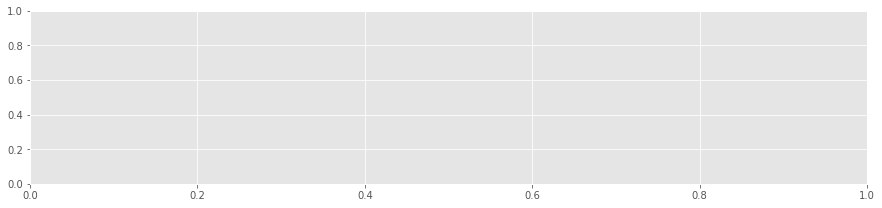

In [505]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
#plt.figure(figsize=(15,7))
#ax = plt.subplot(211)
#sm.graphics.tsa.plot_acf(df_month.DNSvol, lags=20, ax=ax)
#ax = plt.subplot(212)
#sm.graphics.tsa.plot_pacf(df_month.DNSvol, lags=20, ax=ax)
#plt.tight_layout()
#plt.show()

In [545]:
import seaborn as sns
def tsplot2(y,title,lags= None,figsize = (12,8)):
    fig = plt.figure(figsize = figsize)
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout,(0,0))
    hist_ax = plt.subplot2grid(layout,(0,1))
    acf_ax = plt.subplot2grid(layout,(1,0))
    pacf_ax = plt.subplot2grid(layout,(1,1))
    y.plot(ax = ts_ax)
    ts_ax.set_title(title,fontsize=14,fontweight = 'bold' )
    y.plot(ax = hist_ax,kind = 'hist',bins = 25)
    hist_ax.set_title('Histogram')
    sm.graphics.tsa.plot_acf(y,lags =lags,ax =acf_ax)
    sm.graphics.tsa.plot_pacf(y,lags =lags,ax =pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax,pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax,acf_ax,pacf_ax
    

CHECK THE TEMPORAL and value based distribution of each variable

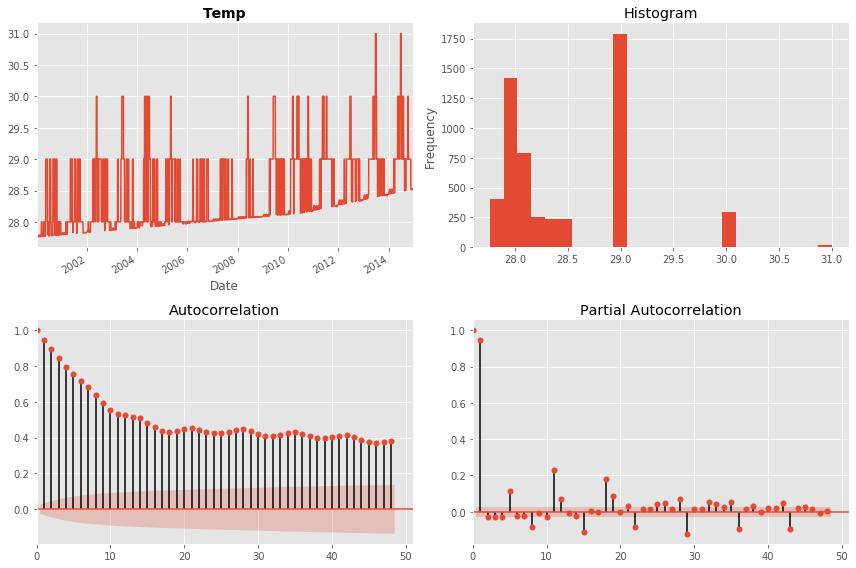

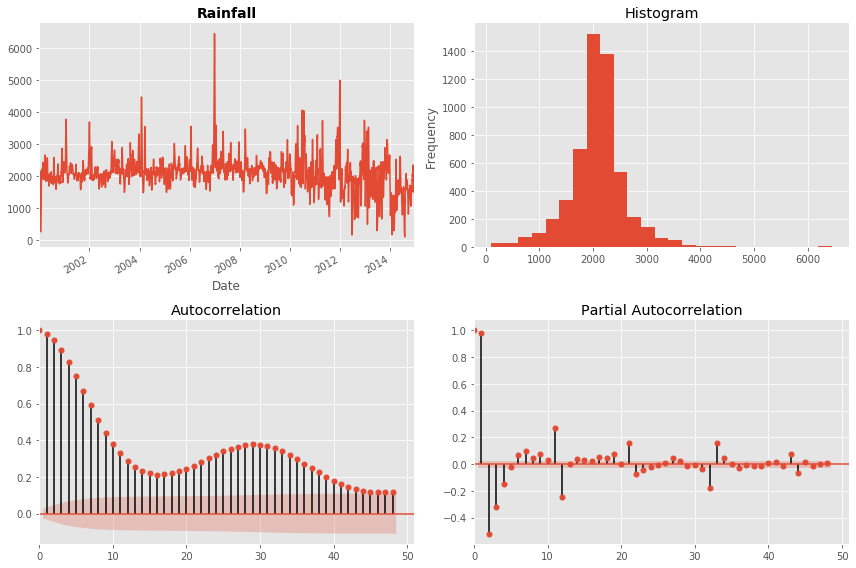

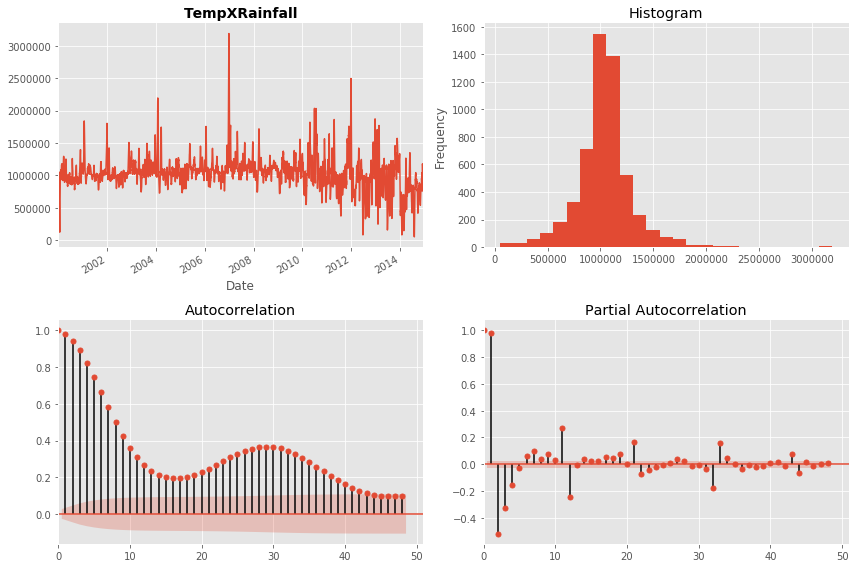

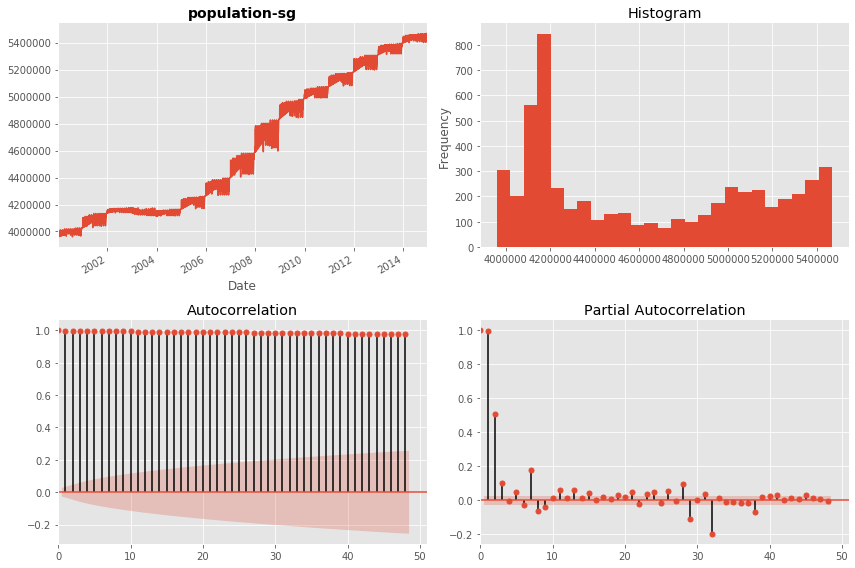

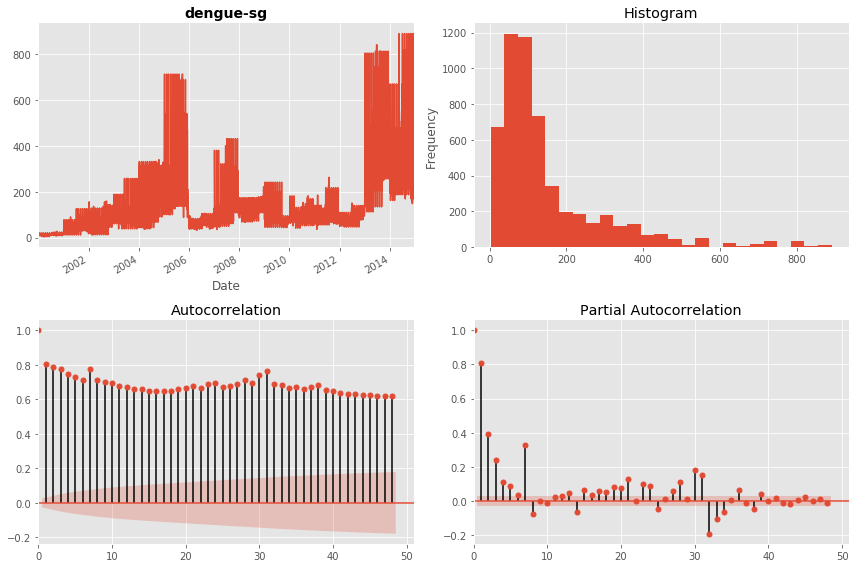

In [546]:
num_var = len(df.iloc[1,:])
for i in range(0,num_var):
    tsplot2(df_train.iloc[:,i].dropna(),title = df.columns[i],lags = 48)

CONSTANT MEAN CHECK- FAILED


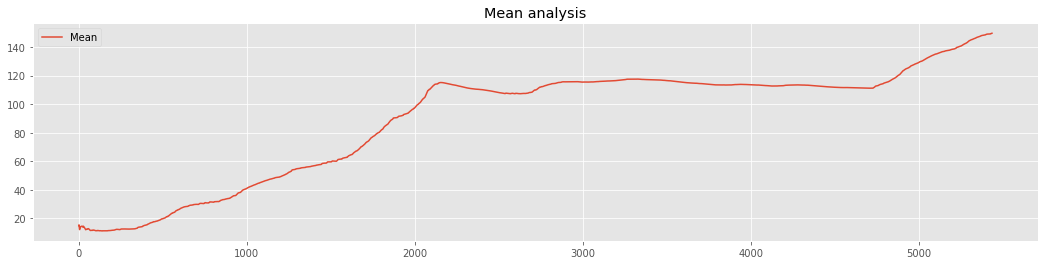

In [549]:
#df.DNSvol[:1]
mean = [np.mean(df_train['dengue-sg'][:x]) for x in range(len(df_train['dengue-sg']))]
mean
plt.figure(figsize=(18,4))
plt.plot(mean, label='Mean')
plt.title('Mean analysis')
plt.legend()
plt.show()

CONSTANT VARIANCE CHECK -FAIL

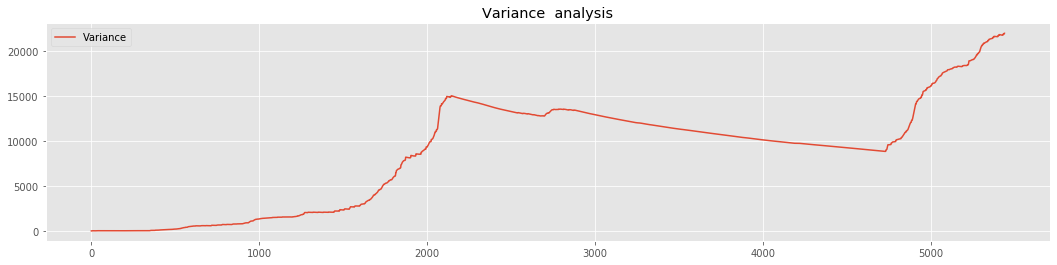

In [551]:
var_check = [np.var(df_train['dengue-sg'][:x]) for x in range(len(df_train['dengue-sg']))]
plt.figure(figsize=(18,4))
#plt.plot(rand3, label='Value')
plt.plot(var_check, label='Variance')
plt.title('Variance  analysis')
plt.legend()
plt.show()

AUTOCORRELLATION CHECK